# Plot SSH variability

Compare models' sea level anomaly with AVISO SSH data.

Calculate model anomaly following https://github.com/COSIMA/ACCESS-OM2-1-025-010deg-report/blob/master/figures/ssh_variance/SeaLevelRMS.ipynb.

In [61]:
import cosima_cookbook as cc
from dask.distributed import Client

import xarray as xr
import matplotlib.pyplot as plt
import cmocean as cm
import matplotlib.gridspec as gridspec
import cartopy.crs as ccrs
#import matplotlib.path as mpath
import numpy as np

In [5]:
client = Client()
client

Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: /proxy/8787/status,
Dashboard: /proxy/8787/status,Workers: 7
Total threads: 28,Total memory: 125.20 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:34245,Workers: 7
Dashboard: /proxy/8787/status,Total threads: 28
Started: Just now,Total memory: 125.20 GiB
Comm: tcp://127.0.0.1:36961,Total threads: 4
Dashboard: /proxy/39869/status,Memory: 17.89 GiB
Nanny: tcp://127.0.0.1:40285,


In [6]:
# CM2 database
session_CM2 = cc.database.create_session('/g/data/p73/archive/non-CMIP/ACCESS-CM2/CM2.db')
expt_CM2_025 = 'cj877'
expt_CM2_1   = 'bz687'

In [8]:
# OM2 database
session_OM2  = cc.database.create_session('/g/data/ik11/databases/cosima_master.db')
expt_OM2_025 = '025deg_jra55_ryf9091_gadi'#'025deg_jra55_ryf9091_gadi'
expt_OM2_1   = '1deg_jra55_ryf9091_gadi'

In [9]:
# Plotting info
ft_size = 16
plt.rcParams.update({'font.size': ft_size})
fig_path = '/g/data/x77/wgh581/Figures/Figures_ACCESS_CM2/'

In [36]:
path_to_data = '/g/data/x77/wgh581/Post_Process/ACCESS_CM2_025/'

Observations

In [2]:
aviso_file = '/g/data3/hh5/tmp/cosima/observations/original/AVISO_Mean_Std/aviso_ssh_monthly_anom_clim9314_GMSLtrend_removed.timstd.nc'
SLMA = xr.open_dataset(aviso_file).SLMA.mean('TAXM')

Load model rms sea level anomaly (calculated below)

In [49]:
sla_rms_CM2_025 = xr.open_dataarray(path_to_data + 'sla_rms_CM2_025_400_499.nc')

In [50]:
sla_rms_CM2_1 = xr.open_dataarray(path_to_data + 'Comparison_ACCESS_CM2_1/sla_rms_CM2_1_400_499.nc')

In [52]:
sla_rms_OM2_025 = xr.open_dataarray(path_to_data + 'Comparison_ACCESS_OM2_025/sla_rms_OM2_025_2300_2399.nc')

In [53]:
sla_rms_OM2_1 = xr.open_dataarray(path_to_data + 'Comparison_ACCESS_OM2_1/sla_rms_OM2_1_2420_2519.nc')

Coordinate stuff

In [64]:
geolon_t = xr.open_dataset('/g/data/ik11/grids/ocean_grid_025.nc').geolon_t
geolat_t = xr.open_dataset('/g/data/ik11/grids/ocean_grid_025.nc').geolat_t

In [65]:
geolon_t_1 = xr.open_dataset('/g/data/ik11/grids/ocean_grid_10.nc').geolon_t
geolat_t_1 = xr.open_dataset('/g/data/ik11/grids/ocean_grid_10.nc').geolat_t

In [70]:
sla_rms_CM2_025 = sla_rms_CM2_025.assign_coords({'geolon_t': geolon_t, 'geolat_t': geolat_t})
sla_rms_OM2_025 = sla_rms_OM2_025.assign_coords({'geolon_t': geolon_t, 'geolat_t': geolat_t})
sla_rms_CM2_1   = sla_rms_CM2_1.assign_coords({'geolon_t': geolon_t_1, 'geolat_t': geolat_t_1})
sla_rms_OM2_1   = sla_rms_OM2_1.assign_coords({'geolon_t': geolon_t_1, 'geolat_t': geolat_t_1})

Plotting

In [54]:
# Use cartopy land for now (option to update to model land but will change with resolution)
import cartopy.feature as cft
land_50m = cft.NaturalEarthFeature('physical', 'land', '50m', edgecolor='black', facecolor='darkgrey', linewidth=0.5)

In [56]:
from palettable.scientific.sequential import Imola_20

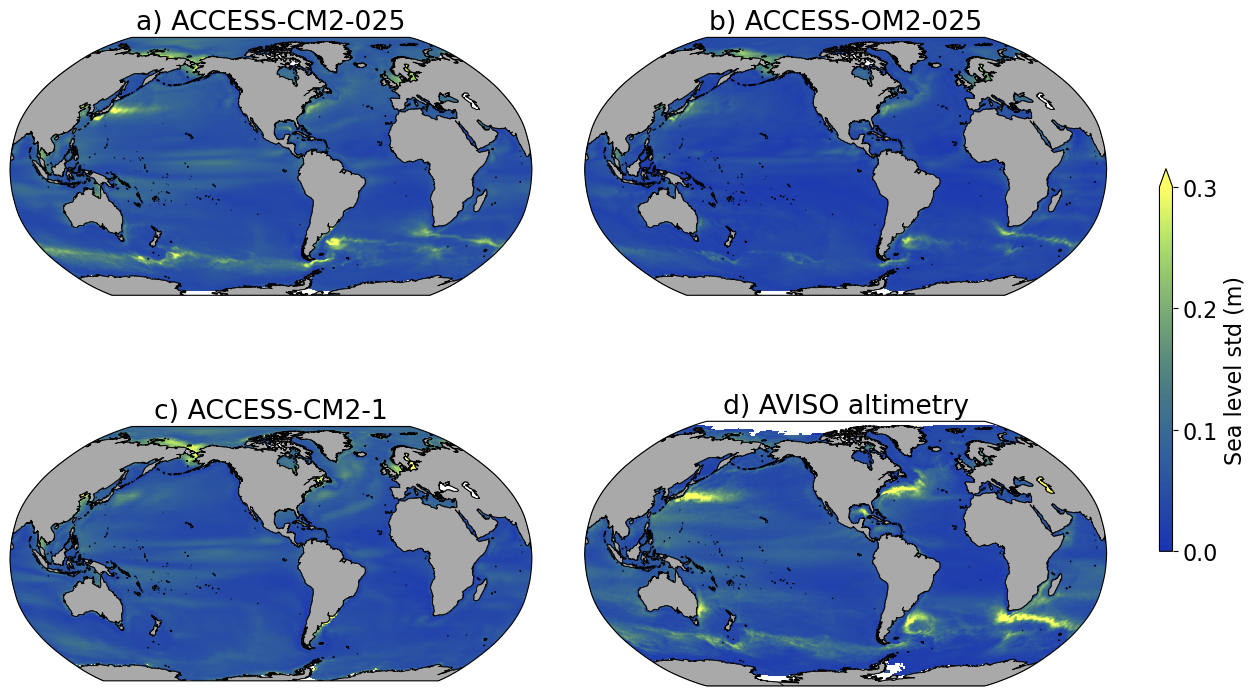

In [72]:
fig = plt.figure(figsize=(15,10))
gs  = gridspec.GridSpec(8, 3, width_ratios=[1, 1, 0.025], hspace=0.05, wspace=0.15)

ax = fig.add_subplot(gs[0:4,0], projection=ccrs.Robinson(central_longitude=-100))
sc = sla_rms_CM2_025.plot(x='geolon_t', y='geolat_t', transform=ccrs.PlateCarree(), vmin=0, vmax=0.3, cmap=Imola_20.mpl_colormap, add_colorbar=False)
#mld_CM2_025_max.mean('time').plot.contour(x='geolon_t', y='geolat_t', transform=ccrs.PlateCarree(), levels=[3000], colour='y')
ax.coastlines(resolution='50m')
ax.add_feature(land_50m)
plt.title('a) ACCESS-CM2-025')

ax = fig.add_subplot(gs[0:4,1], projection=ccrs.Robinson(central_longitude=-100))
sla_rms_OM2_025.plot(x='geolon_t', y='geolat_t', transform=ccrs.PlateCarree(), vmin=0, vmax=0.3, cmap=Imola_20.mpl_colormap, add_colorbar=False)
ax.coastlines(resolution='50m')
ax.add_feature(land_50m)
plt.title('b) ACCESS-OM2-025')

ax = fig.add_subplot(gs[4:,0], projection=ccrs.Robinson(central_longitude=-100))
sla_rms_CM2_1.plot(x='geolon_t', y='geolat_t', transform=ccrs.PlateCarree(), vmin=0, vmax=0.3, cmap=Imola_20.mpl_colormap, add_colorbar=False)
ax.coastlines(resolution='50m')
ax.add_feature(land_50m)
plt.title('c) ACCESS-CM2-1')

ax = fig.add_subplot(gs[4:,1], projection=ccrs.Robinson(central_longitude=-100))
#sla_rms_OM2_1.plot(x='xt_ocean', y='yt_ocean', transform=ccrs.PlateCarree(), vmin=0, vmax=0.3, cmap=Imola_20.mpl_colormap, add_colorbar=False)
SLMA.plot(transform=ccrs.PlateCarree(), vmin=0, vmax=0.3, cmap=Imola_20.mpl_colormap, add_colorbar=False)
ax.coastlines(resolution='50m')
ax.add_feature(land_50m)
#plt.title('d) ACCESS-OM2-1')
plt.title('d) AVISO altimetry')

cbar_ax = fig.add_subplot(gs[2:6, 2])
cbar = plt.colorbar(sc, cax=cbar_ax, ticks=np.arange(0, 0.31, 0.1), label='Sea level std (m)', extend='max')

# Finished
save_flag = 1
if save_flag == 1:
    fig_name = 'Fig_rms_sla_maps.png'
    plt.savefig(fig_path + fig_name, dpi=300);

---
### Calculate model rms sea level anomaly

In [30]:
start_time = '0400-01-01'
end_time   = '0499-12-31'

In [40]:
def get_rms_sla(expt, session, start_time='0400-01-01', end_time='0400-12-31'):
    sea_level = cc.querying.getvar(expt, 'sea_level', session, start_time=start_time, end_time=end_time, frequency='1 monthly')
    sea_level = sea_level.sel(time=slice(start_time, end_time)).mean('time')

    sea_level_sq = cc.querying.getvar(expt, 'sea_level_sq', session, start_time=start_time, end_time=end_time, frequency='1 monthly')
    sea_level_sq = sea_level_sq.sel(time=slice(start_time, end_time)).mean('time')
    
    # RMS of sea level anomaly
    sla_rm = (sea_level_sq - sea_level**(2.0))**(0.5)
    
    return sla_rm


def get_rms_sla_OM2(expt, session, start_time='0400-01-01', end_time='0400-12-31'):
    sea_level = cc.querying.getvar(expt, 'sea_level', session, start_time=start_time, end_time=end_time, frequency='1 monthly')
    sea_level = sea_level.sel(time=slice(start_time, end_time)).mean('time')

    sea_level_sq = cc.querying.getvar(expt, 'sea_levelsq', session, start_time=start_time, end_time=end_time, frequency='1 monthly')
    sea_level_sq = sea_level_sq.sel(time=slice(start_time, end_time)).mean('time')
    
    # RMS of sea level anomaly
    sla_rm = (sea_level_sq - sea_level**(2.0))**(0.5)
    
    return sla_rm

In [ ]:
%%time
sla_rm_CM2_025 = get_rms_sla(expt_CM2_025, session_CM2, start_time=start_time, end_time=end_time)

In [ ]:
sla_rm_CM2_1 = get_rms_sla(expt_CM2_1, session_CM2, start_time=start_time, end_time=end_time)

In [ ]:
sla_rm_OM2_025 = get_rms_sla_OM2(expt_OM2_025, session_OM2, start_time='2300-01-01', end_time='2399-12-31')

In [ ]:
# Different time (later in run as data is missing for the years I usually take)
sla_rm_OM2_1 = get_rms_sla_OM2(expt_OM2_1, session_OM2, start_time='2420-01-01', end_time='2519-12-31')

Load data

In [ ]:
sla_rm_CM2_025 = sla_rm_CM2_025.load()

In [38]:
sla_rm_CM2_1 = sla_rm_CM2_1.load()

In [ ]:
sla_rm_OM2_025 = sla_rm_OM2_025.load()

In [47]:
sla_rm_OM2_1 = sla_rm_OM2_1.load()

Save output

In [37]:
sla_rm_CM2_025.to_netcdf(path_to_data + 'sla_rms_CM2_025_400_499.nc')

In [39]:
sla_rm_CM2_1.to_netcdf(path_to_data + 'Comparison_ACCESS_CM2_1/sla_rms_CM2_1_400_499.nc')

In [44]:
sla_rm_OM2_025.to_netcdf(path_to_data + 'Comparison_ACCESS_OM2_025/sla_rms_OM2_025_2300_2399.nc')

In [48]:
sla_rm_OM2_1.to_netcdf(path_to_data + 'Comparison_ACCESS_OM2_1/sla_rms_OM2_1_2420_2519.nc')